In [237]:
# !pip install yfinance
# !pip install tfcausalimpact
import pandas as pd
import numpy as np
import yfinance as yf
from causalimpact import CausalImpact
import seaborn as sns
import matplotlib.pyplot as plt

# Use Casual Impact to measure the impact of the CO2 scandal in VW stock price

#Pick stocks for control groups (avoid others that had other major news in same
period)
#Training and treatment periods
#Fetch tickers with yfinance
#Stationarity assess/fix
#Check correlation
#Set pre and post period
#Run Causal Impact
#Interpret


In [238]:
# Dates
training_start = '2014-01-08'
training_end = '2015-08-26'
treatment_start = '2015-09-02' # Scandal made
treatment_end = '2015-10-01'
end_stock = '2015-10-02'

In [239]:
# Get VW stock info

y = ['VOW.DE']
y = yf.download(y, start=training_start, end=end_stock, interval = '1wk')

y.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-06,194.050003,197.500000,192.550003,194.899994,117.486755,266513
2014-01-13,195.649994,197.850006,189.699997,197.350006,118.963623,468531
2014-01-20,196.350006,197.899994,184.899994,185.000000,111.518967,434638
2014-01-27,185.000000,189.899994,177.300003,180.350006,108.715950,514920
2014-02-03,180.899994,183.399994,171.949997,182.500000,110.011955,392696


In [240]:
y = y['Adj Close'].rename('y')
y.head(1)


Date
2014-01-06    117.486755
Name: y, dtype: float64

In [241]:
# Control Group - Other manufacturing might be more appropriate but hey

stocks = [ 'META', 'GOOG', 'AMZ', 'MSFT', 'AAPL', 'SONY', 'NVDA']
X = yf.download(stocks, start=training_start, end=end_stock, interval = '1wk')
X.head()

[*********************100%%**********************]  7 of 7 completed


Price       Adj Close                                                         \
Ticker           AAPL         AMZ       GOOG       META       MSFT      NVDA   
Date                                                                           
2014-01-06  16.642731  290.200012  28.116995  57.821182  30.237169  0.370958   
2014-01-13  16.884125  296.000000  28.623270  56.184544  30.522425  0.377090   
2014-01-20  17.052759  287.000000  27.959017  54.338337  30.883190  0.366949   
2014-01-27  15.632809  271.299988  29.380566  62.441689  31.747349  0.370251   
2014-02-03  16.228640  260.450012  29.292744  64.188095  30.673441  0.374260   

Price                      Close                         ...       Open  \
Ticker           SONY       AAPL         AMZ       GOOG  ...       MSFT   
Date                                                     ...              
2014-01-06  17.799999  19.033571  290.200012  28.148991  ...  36.000000   
2014-01-13  17.049999  19.309643  296.000000  28.655842  ...  35.990002   
2014-01-20  16.719999  19.502501  287.000000  27.990833  ...  36.820000   
2014-01-27  15.750000  17.878571  271.299988  29.414000  ...  36.869999   
2014-02-03  16.820000  18.559999  260.450012  29.326078  ...  37.740002   

Price                               Volume                                 \
Ticker         NVDA       SONY        AAPL      AMZ       GOOG       META   
Date                                                                        
2014-01-06  0.40500  17.400000   842654400   5767.0  259790122  191385200   
2014-01-13  0.39325  17.680000  1758710800  13308.0  451160746  209568900   
2014-01-20  0.40025  17.049999  1541106000  22153.0  377124276  213174600   
2014-01-27  0.38900  16.469999  3266510800  44300.0  786994834  453084400   
2014-02-03  0.39525  15.600000  1734535600  54035.0  576484737  275328000   

Price                                        
Ticker           MSFT        NVDA      SONY  
Date                                         
2014-01-06  137036800   818856000  14581800  
2014-01-13  216624000  1221256000  14723000  
2014-01-20  173821100  1015740000  12202400  
2014-01-27  261570800  1102996000  18463100  
2014-02-03  243187700  1252724000  23578400  

[5 rows x 42 columns]

In [242]:
X = X.iloc[:,:len(stocks)]
X.columns = X.columns.droplevel()
X.head()

Ticker,AAPL,AMZ,GOOG,META,MSFT,NVDA,SONY
Date,,,,,,,
2014-01-06,16.642731,290.200012,28.116995,57.821182,30.237169,0.370958,17.799999
2014-01-13,16.884125,296.000000,28.623270,56.184544,30.522425,0.377090,17.049999
2014-01-20,17.052759,287.000000,27.959017,54.338337,30.883190,0.366949,16.719999
2014-01-27,15.632809,271.299988,29.380566,62.441689,31.747349,0.370251,15.750000
2014-02-03,16.228640,260.450012,29.292744,64.188095,30.673441,0.374260,16.820000


In [243]:
# Timezones
X.index = X.index.tz_localize(None)
X.index

DatetimeIndex(['2014-01-06', '2014-01-13', '2014-01-20', '2014-01-27',
               '2014-02-03', '2014-02-10', '2014-02-17', '2014-02-24',
               '2014-03-03', '2014-03-10', '2014-03-17', '2014-03-24',
               '2014-03-31', '2014-04-07', '2014-04-14', '2014-04-21',
               '2014-04-28', '2014-05-05', '2014-05-12', '2014-05-19',
               '2014-05-26', '2014-06-02', '2014-06-09', '2014-06-16',
               '2014-06-23', '2014-06-30', '2014-07-07', '2014-07-14',
               '2014-07-21', '2014-07-28', '2014-08-04', '2014-08-11',
               '2014-08-18', '2014-08-25', '2014-09-01', '2014-09-08',
               '2014-09-15', '2014-09-22', '2014-09-29', '2014-10-06',
               '2014-10-13', '2014-10-20', '2014-10-27', '2014-11-03',
               '2014-11-10', '2014-11-17', '2014-11-24', '2014-12-01',
               '2014-12-08', '2014-12-15', '2014-12-22', '2014-12-29',
               '2015-01-05', '2015-01-12', '2015-01-19', '2015-01-26',
      

In [244]:
# Combine X and y

df = pd.concat([y, X], axis=1).dropna()

df.head()

,y,AAPL,AMZ,GOOG,META,MSFT,NVDA,SONY
Date,,,,,,,,
2014-01-06,117.486755,16.642731,290.200012,28.116995,57.821182,30.237169,0.370958,17.799999
2014-01-13,118.963623,16.884125,296.000000,28.623270,56.184544,30.522425,0.377090,17.049999
2014-01-20,111.518967,17.052759,287.000000,27.959017,54.338337,30.883190,0.366949,16.719999
2014-01-27,108.715950,15.632809,271.299988,29.380566,62.441689,31.747349,0.370251,15.750000
2014-02-03,110.011955,16.228640,260.450012,29.292744,64.188095,30.673441,0.374260,16.820000


In [245]:
#Prepare the df with training data
df_train = df[df.index <= training_end]
df_train.tail()

,y,AAPL,AMZ,GOOG,META,MSFT,NVDA,SONY
Date,,,,,,,,
2015-07-13,127.579147,29.166353,445.350006,33.608253,94.775246,40.733696,0.485872,28.120001
2015-07-27,115.840858,27.294226,484.250000,31.244946,93.817215,40.803577,0.482967,28.350000
2015-08-10,113.291801,26.210762,478.299988,32.818653,94.226372,41.065712,0.569876,27.120001
2015-08-17,103.850815,23.905224,445.049988,30.589191,85.883514,37.631920,0.519764,24.510000
2015-08-24,107.312523,25.607250,465.399994,31.483173,90.823364,38.636440,0.552583,25.870001


<Axes: >

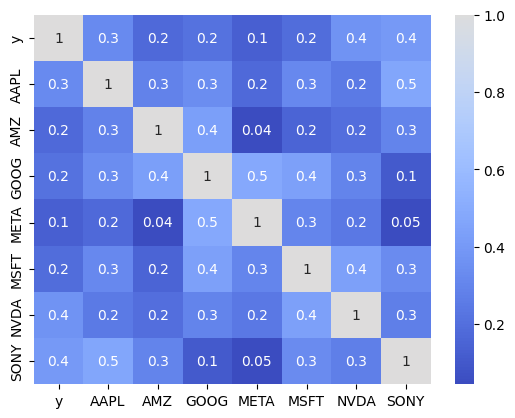

In [246]:
#Differnecing and heatmap in 1

sns.heatmap(df_train.pct_change().dropna().corr(), annot=True, cmap='coolwarm' , fmt='.1g', center = True)

In [252]:
# Goog, Meta, MSFT too weakly correlated to use so drop

df_final = df.drop(columns=['GOOG', 'META', 'MSFT'])
df_final.head()

,y,AAPL,AMZ,NVDA,SONY
Date,,,,,
2014-01-06,117.486755,16.642731,290.200012,0.370958,17.799999
2014-01-13,118.963623,16.884125,296.000000,0.377090,17.049999
2014-01-20,111.518967,17.052759,287.000000,0.366949,16.719999
2014-01-27,108.715950,15.632809,271.299988,0.370251,15.750000
2014-02-03,110.011955,16.228640,260.450012,0.374260,16.820000


In [253]:
# Causal throwing error because dates dont line up so cheat
print(df_final.head(1))
print(df_final.tail(10))

                     y       AAPL         AMZ      NVDA       SONY
Date                                                              
2014-01-06  117.486755  16.642731  290.200012  0.370958  17.799999
                     y       AAPL         AMZ      NVDA       SONY
Date                                                              
2015-07-13  127.579147  29.166353  445.350006  0.485872  28.120001
2015-07-27  115.840858  27.294226  484.250000  0.482967  28.350000
2015-08-10  113.291801  26.210762  478.299988  0.569876  27.120001
2015-08-17  103.850815  23.905224  445.049988  0.519764  24.510000
2015-08-24  107.312523  25.607250  465.399994  0.552583  25.870001
2015-08-31  100.672371  24.698599  450.100006  0.528758  24.559999
2015-09-07  104.637573  25.815203  463.899994  0.550637  26.160000
2015-09-14  101.553513  25.643421  477.899994  0.566196  25.410000
2015-09-21   72.727051  25.928219  480.350006  0.573976  25.340000
2015-09-28   63.663712  24.949499  459.700012  0.602906  25.76

In [257]:
# Make the dates match
training_start = '2014-01-06'
training_end = '2015-08-31'
treatment_start = '2015-09-07' # Scandal made
treatment_end = '2015-09-28'
end_stock = '2015-10-02'

In [258]:
# Pre and Post Period
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]

Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


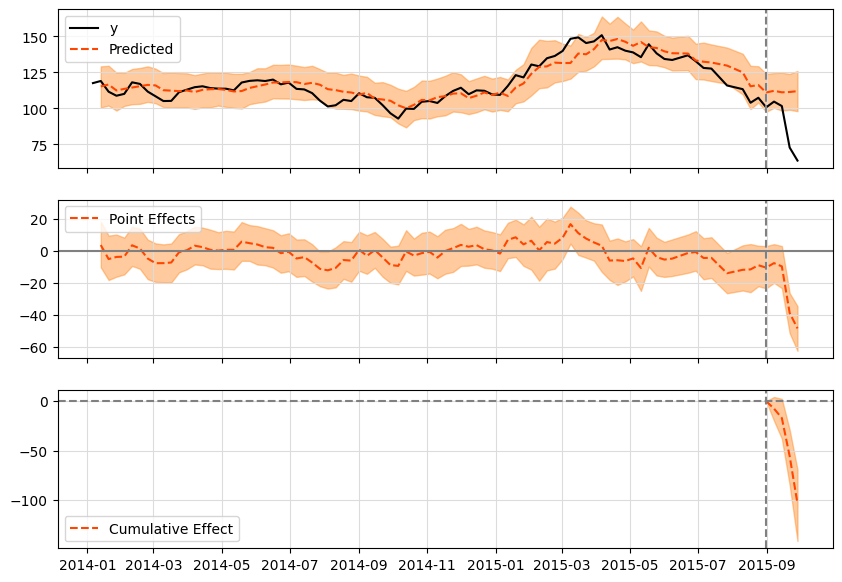

In [259]:
# Google Causal Impact

impact = CausalImpact(df_final, pre_period, post_period)
# Directly call the plot method without assigning to fig
impact.plot()



In [260]:
# Summary
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    85.65              342.58
Prediction (s.d.)         111.62 (4.5)       446.47 (18.0)
95% CI                    [102.88, 120.52]   [411.52, 482.09]

Absolute effect (s.d.)    -25.97 (4.5)       -103.89 (18.0)
95% CI                    [-34.88, -17.24]   [-139.51, -68.94]

Relative effect (s.d.)    -23.27% (4.03%)    -23.27% (4.03%)
95% CI                    [-31.25%, -15.44%] [-31.25%, -15.44%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [261]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 85.65. By contrast, in the absence of an
intervention, we would have expected an average response of 111.62.
The 95% interval of this counterfactual prediction is [102.88, 120.52].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -25.97 with a 95% interval of
[-34.88, -17.24]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 342.58.
By contrast, had the intervention not taken place, we would have expected
a sum of 446.47. The 95% interval of this prediction is [411.52, 482.09].


The above results are given in terms of absolute numbers. In relative
terms, the response 